In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
# I would like to prepair data
#   1) check data add labels by the last two columns of dataframe
excel_file = pd.ExcelFile('./data/data.xlsx')
df = excel_file.parse('Лист1')
len_rows = len(df.axes[0])
len_cols = len(df.axes[1])

In [4]:
names = list(df.columns.values)
dict = {}
for column in names:
    new_column = column.replace('.', '_')
    dict[column] = new_column
# I would like to use names of columns without '.'
df.rename(columns=dict, inplace=True)
print(dict)
# Also I need to add labels
#       0 - no circuit
#       1 - some circuit with amplitude and frequency
classes = []
for row_num in range(len_rows):
    ampitude = df['pls_ampl'].loc[df.index[row_num]]
    frequency = df['frequency'].loc[df.index[row_num]]
    if ampitude == 0 and \
            frequency == 0:
        classes.append(0)
    else:
        classes.append(1)
df['label'] = classes
#df = df.drop(['Unnamed: 0'], axis=1)
print(df)
# I would like to save that as a data for our models
df.to_csv('./data/fresh_data.csv')

{'cone_angl': 'cone_angl', 'axial_speed': 'axial_speed', 'axial_speed.1': 'axial_speed_1', 'axial_speed.2': 'axial_speed_2', 'axial_speed.3': 'axial_speed_3', 'axial_speed.4': 'axial_speed_4', 'axial_speed.5': 'axial_speed_5', 'axial_speed.6': 'axial_speed_6', 'axial_speed.7': 'axial_speed_7', 'axial_speed.8': 'axial_speed_8', 'axial_speed.9': 'axial_speed_9', 'axial_speed.10': 'axial_speed_10', 'axial_speed.11': 'axial_speed_11', 'axial_speed.12': 'axial_speed_12', 'axial_speed.13': 'axial_speed_13', 'axial_speed.14': 'axial_speed_14', 'axial_speed.15': 'axial_speed_15', 'axial_speed.16': 'axial_speed_16', 'axial_speed.17': 'axial_speed_17', 'axial_speed.18': 'axial_speed_18', 'axial_speed.19': 'axial_speed_19', 'axial_speed.20': 'axial_speed_20', 'axial_speed.21': 'axial_speed_21', 'axial_speed.22': 'axial_speed_22', 'axial_speed.23': 'axial_speed_23', 'axial_speed.24': 'axial_speed_24', 'axial_speed.25': 'axial_speed_25', 'axial_speed.26': 'axial_speed_26', 'axial_speed.27': 'axial_

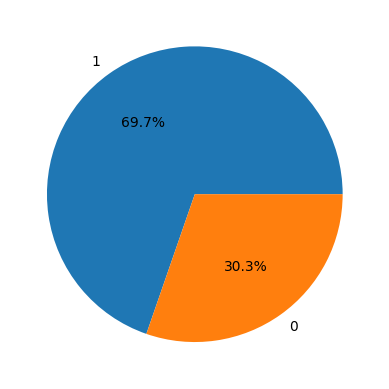

In [5]:
fig, ax = plt.subplots()
sizes = df.label.value_counts()
pie = ax.pie(
    sizes,
    labels=sizes.index,
    autopct='%1.1f%%',
)
# As we can see, the first class is superior
# That's why we should use f1 metrics and presicion/recall as a metrics

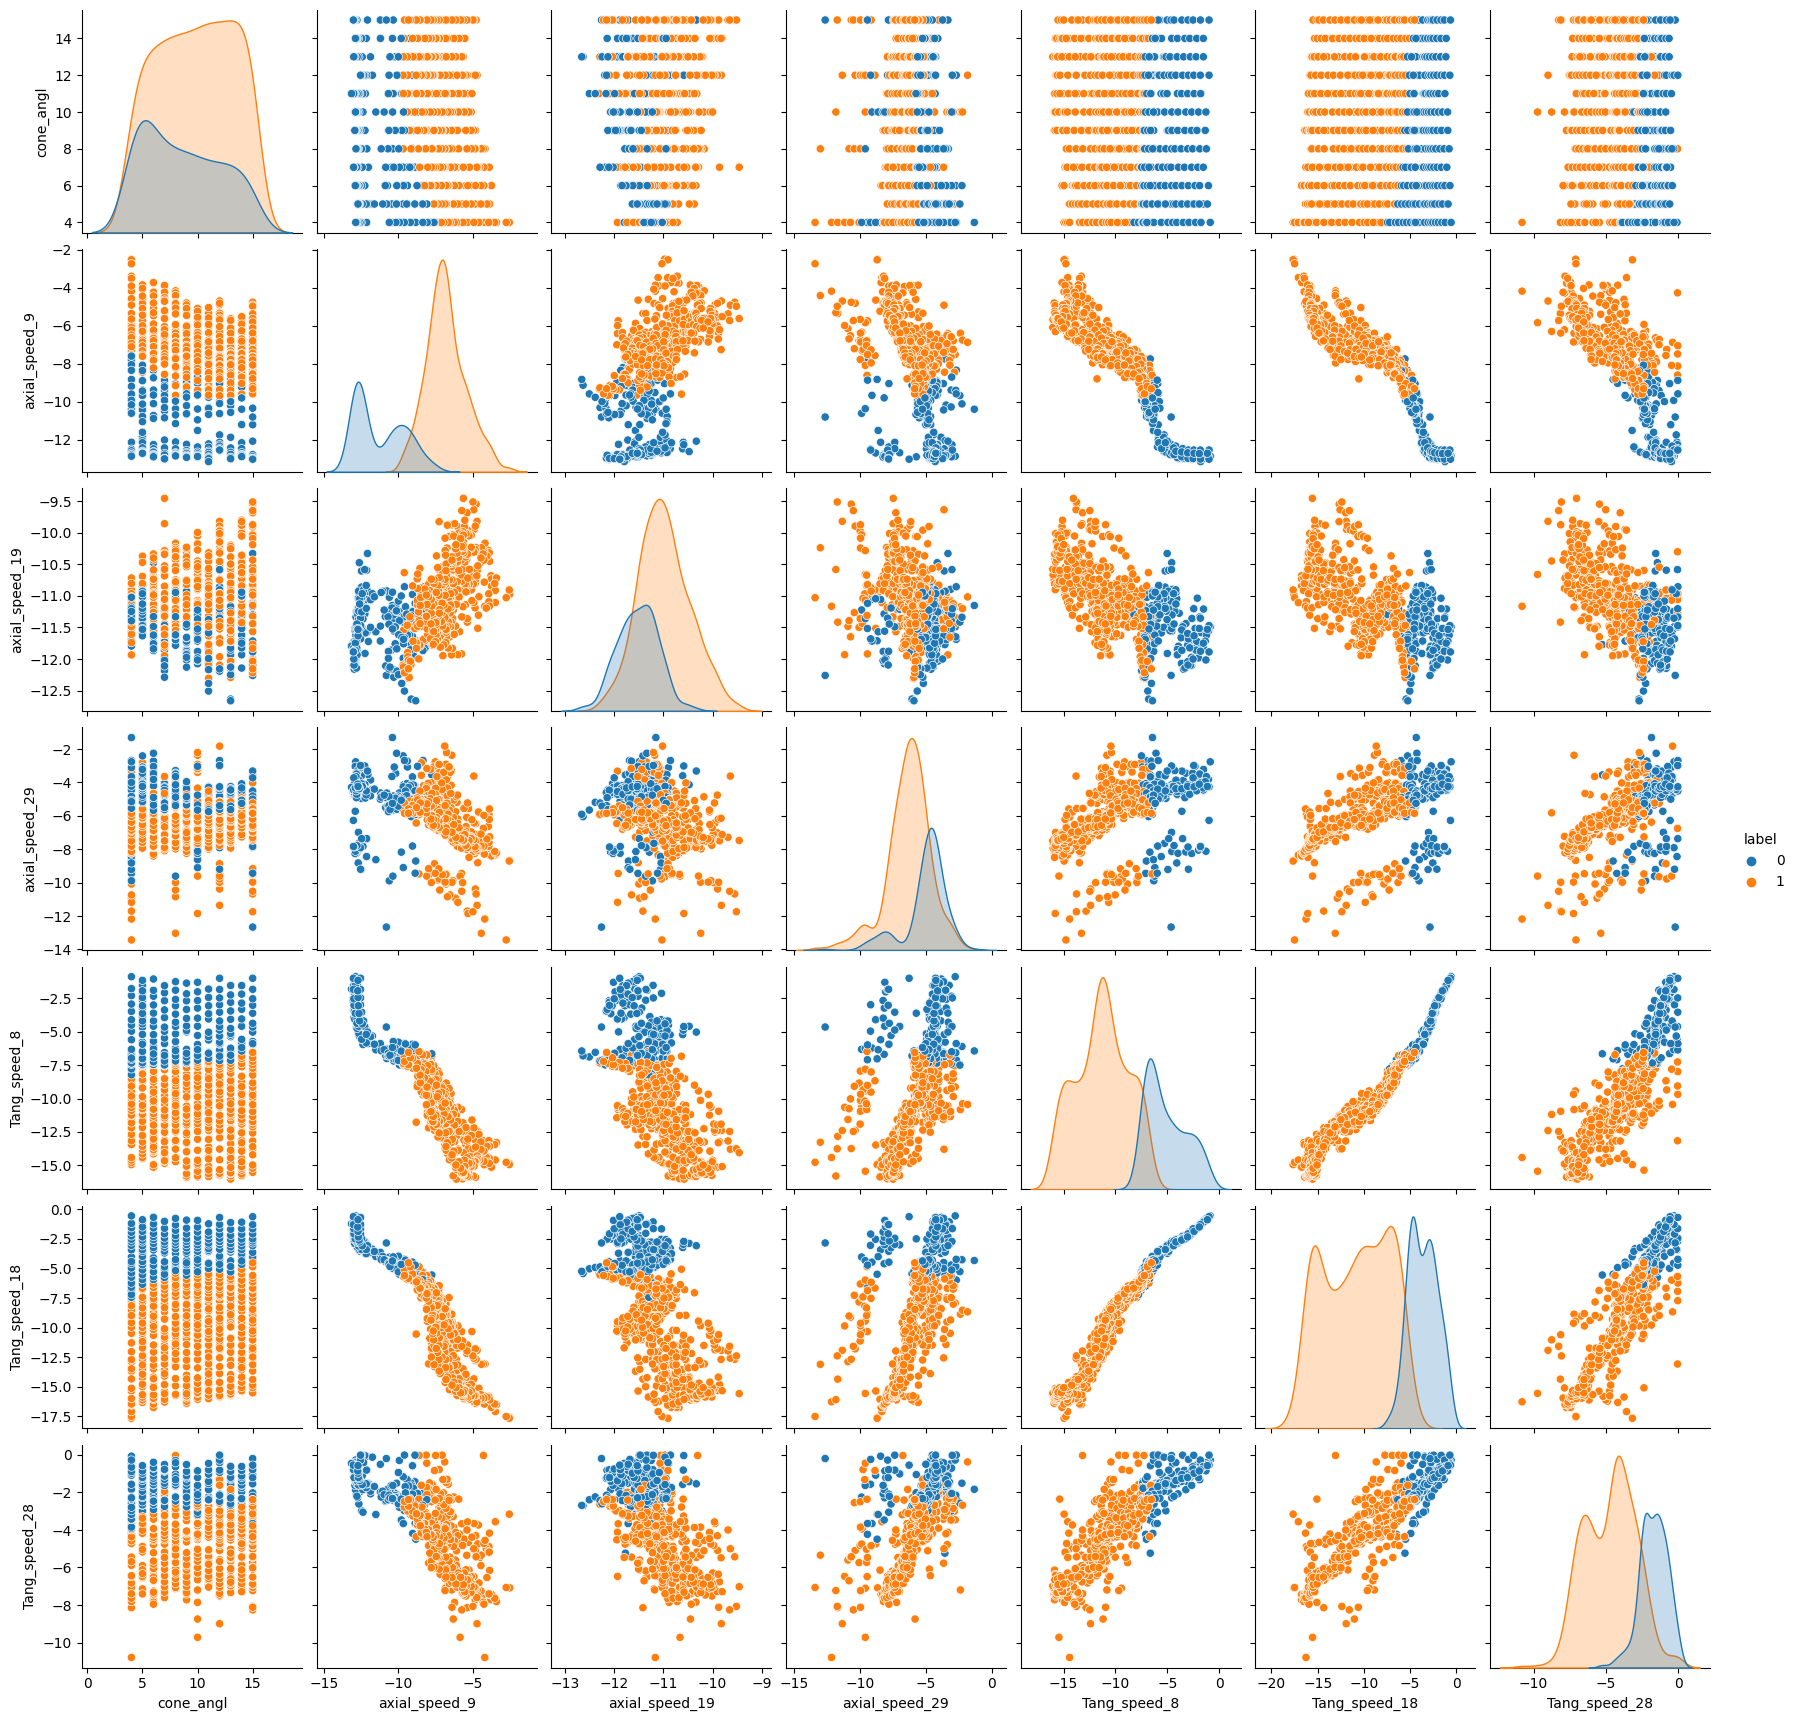

In [6]:
cols = ['cone_angl', 'axial_speed_9', 'axial_speed_19', 'axial_speed_29', 'Tang_speed_8', 'Tang_speed_18', 'Tang_speed_28', 'label']
sns.pairplot(data=df[cols], hue="label")

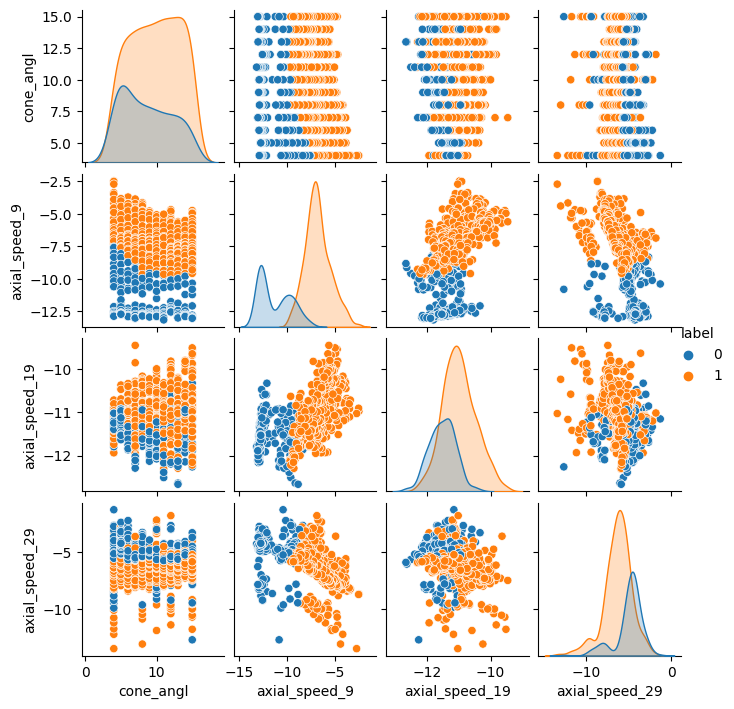

In [7]:
cols = ['cone_angl', 'axial_speed_9', 'axial_speed_19', 'axial_speed_29', 'label']
g = sns.pairplot(data=df[cols], hue="label")
g.fig.set_size_inches(7,7)

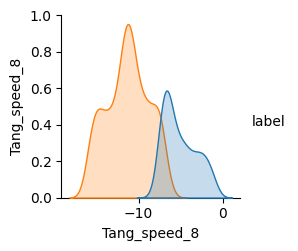

In [8]:
# The most important data
cols = ['Tang_speed_8', 'label']
sns.pairplot(data=df[cols], hue="label")

In [29]:
def check(chk_1, chk_2):
    # calculate function
    past = np.abs(chk_1)
    now = np.abs(chk_2)
    print(past, chk_1, now)
    result = False
    if now > past:
        result = True
    return result
# Prepaire data for new model
#new_data_view = df[['cone_angl', 'label']]
mx_a_list = [-10 for i in range(706)]
mx_t_list = [-10 for i in range(706)]
index_a_list = [-10 for i in range(706)]
index_t_list = [-10 for i in range(706)]
axil_by_index = [-10 for i in range(706)]
tang_by_index = [-10 for i in range(706)]
# From standart table I would like to add angl/axila_ms/tang_ms/index/ something else
for index, row in df.iterrows():
    # update body of cicle with numpy
    # print(index, row)
    # index of cone_angl axial_speed tang_speed
    #            \          \           \
    #             0         1 - 30      31 - 59
    # print(type(row))
    
    mx_a = 0
    mx_t = 0
    index_a = 0
    index_t = 0
    for column_index in range(1,60):
        if (column_index <= 30) and (check(mx_a, row[column_index])):
            #print(row[column_index])
            mx_a = row[column_index]
            index_a = column_index
            #print(mx_a)
        elif ((column_index > 30) and (column_index < 60) and (check(mx_t, row[column_index]))):
            mx_t = row[column_index]
            index_t = column_index
    mx_a_list[index] = mx_a
    mx_t_list[index] = mx_t
    index_a_list[index] = index_a
    index_t_list[index] = index_t
    axil_by_index[index] = row[index_t - 28]
    tang_by_index[index] = row[index_a + 28] 
    

d = {
    'axial_max':mx_a_list,
    'tang_max':mx_t_list,
    'index_of_axm':index_a_list,
    'index_of_tnm':index_t_list,
    'axial_in_mxt':axil_by_index,
    'tang_in_mxa':tang_by_index,
    'cone_angl':df['cone_angl'],
    'label':df['label']
}
new_data_view = pd.DataFrame( data = d)

'''
new_data_view['mx_a'] = mx_a_list
new_data_view['index_of_a'] = index_a_list
new_data_view['mx_t'] = mx_t_list
new_data_view['index_of_t'] = index_t_list
new_data_view['label'] = df['label']
'''


new_data_view.head(40)

0 0 4.30538558625038
4.30538558625038 4.30538558625038 3.95351262504546
4.30538558625038 4.30538558625038 3.68136008167456
4.30538558625038 4.30538558625038 2.99035472499243
4.30538558625038 4.30538558625038 2.24785492881068
4.30538558625038 4.30538558625038 1.3993720379678
4.30538558625038 4.30538558625038 0.394124546813987
4.30538558625038 4.30538558625038 0.579196998399257
4.30538558625038 4.30538558625038 1.44775860530986
4.30538558625038 4.30538558625038 2.49093928385309
4.30538558625038 4.30538558625038 3.54513194200571
4.30538558625038 4.30538558625038 4.37633874125292
4.37633874125292 -4.37633874125292 5.35597317460594
5.35597317460594 -5.35597317460594 6.16631531949891
6.16631531949891 -6.16631531949891 7.13674030288524
7.13674030288524 -7.13674030288524 7.91195901318567
7.91195901318567 -7.91195901318567 8.74074341663883
8.74074341663883 -8.74074341663883 9.4869669695442
9.4869669695442 -9.4869669695442 10.1253363948769
10.1253363948769 -10.1253363948769 10.975492672142
10.97

axial_max   tang_max  index_of_axm  index_of_tnm  axial_in_mxt   
0  -16.549675 -17.654378            28            48    -10.975493  \
1  -16.564726 -17.815883            28            52    -14.410172   
2  -16.335568 -17.578816            28            50    -12.664116   
3  -15.968865 -17.108087            28            47    -10.236513   
4  -15.227270 -16.266240            28            49    -12.056063   
5  -14.682051 -15.377140            27            51    -13.252567   
6  -14.086215 -14.515554            27            50    -12.391912   
7  -13.962619 -13.729980            28            45     -9.941273   
8  -13.620183 -13.183838            27            44     -9.637045   
9  -12.883969 -11.235115            24            41     -8.141471   
10 -13.098969 -11.084784            26            42     -9.056235   
11 -12.751146 -10.814068            25            42     -9.361753   
12 -12.733408 -10.284844            26            41     -8.761382   
13 -12.569104  -9.657776            25            41     -8.909603   
14 -12.345295  -9.201949            26            41     -8.901943   
15 -12.036936  -8.703122            25            41     -9.106187   
16 -12.093025  -8.252911            26            43     -9.929964   
17 -11.849261  -7.549344            23            39     -8.266607   
18 -11.658713  -7.279562            23            41     -9.570545   
19 -11.777086  -7.101903            21            39     -9.106933   
20 -11.710644  -7.058038            20            38     -8.824011   
21 -11.638748  -6.964661            19            38     -9.647605   
22 -11.585861  -6.722429            17            38     -9.794286   
23 -11.560956  -6.470630            16            38    -10.391926   
24 -11.600770  -6.371573            18            38    -10.609379   
25 -12.200894  -7.121824             9            33    -11.261093   
26 -12.520559  -7.137876             8            32    -12.362288   
27 -12.818602  -6.040567             2            33    -12.799005   
28 -13.215452  -5.033090             1            34    -12.954712   
29 -13.300761  -3.852403             1            35    -13.011121   
30 -13.258166  -2.985966             1            37    -12.896372   
31 -13.067992  -2.418091             1            38    -12.840828   
32 -12.961742  -1.780908             1            40    -12.807421   
33 -12.920825  -0.913827             7            40    -12.845479   
34 -14.585683 -16.321660            26            50    -12.661049   
35 -14.557987 -16.435169            26            50    -12.806043   
36 -14.494652 -16.160834            27            50    -12.735999   
37 -14.057345 -15.862358            25            49    -12.094770   
38 -15.165472 -15.740598            28            51    -13.164627   
39 -14.652715 -15.130899            27            48    -11.361916   

    tang_in_mxa  cone_angl  label  
0    -16.597827          4      1  
1    -16.724255          4      1  
2    -16.415995          4      1  
3    -15.878571          4      1  
4    -15.246275          4      1  
5    -14.618555          4      1  
6    -13.732776          4      1  
7    -13.021375          4      1  
8    -12.329567          4      1  
9     -9.640001          4      1  
10    -8.825162          4      1  
11    -8.678182          4      1  
12    -8.237699          4      1  
13    -7.845732          4      1  
14    -7.313921          4      1  
15    -7.033141          4      1  
16    -6.611329          4      1  
17    -6.534622          4      0  
18    -6.230810          4      0  
19    -5.984911          4      0  
20    -5.712285          4      0  
21    -5.299538          4      0  
22    -5.193409          4      0  
23    -5.224505          4      0  
24    -4.622776          4      0  
25    -6.163064          4      0  
26    -6.174270          4      0  
27    -3.111190          4      0  
28    -8.857756          4      0  
29    -6.749558          4      0  
30    -7.273524  

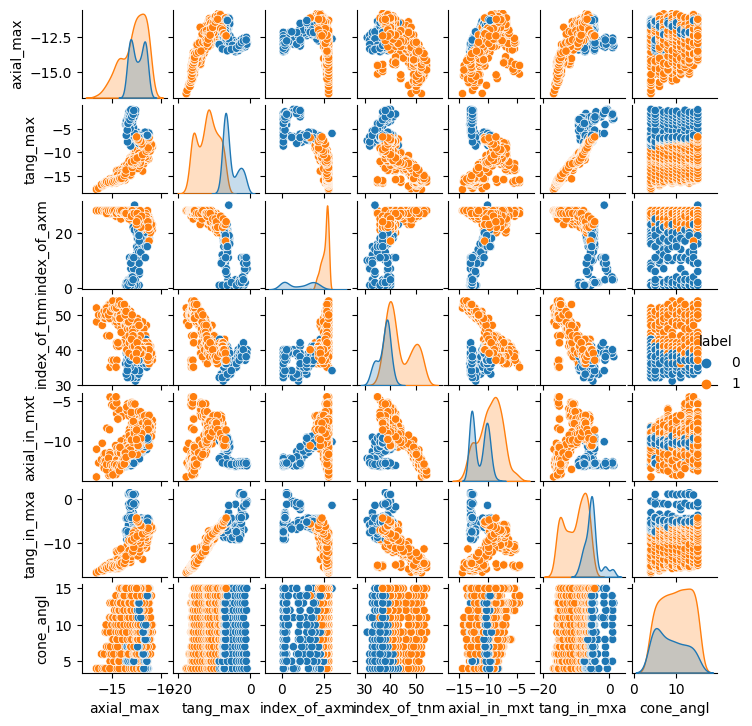

In [30]:
# With seaborn
cols = list(new_data_view.columns.values)
g = sns.pairplot(data=new_data_view[cols], hue="label")
g.fig.set_size_inches(7,7)

In [31]:
new_data_view.to_csv('./data/update_data.csv')